In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
import datetime
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from scipy.stats import skew
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_table_18 = pd.read_excel('/content/gdrive/MyDrive/Conagrs_dataset/IRI_POS_Tablespreads_2018.xlsx')
df_table_attributes = pd.read_excel('/content/gdrive/MyDrive/Conagrs_dataset/IRI_POS_Tablespreads_Product Attribute File.xlsx')
df_cooking_salads = pd.read_excel('/content/gdrive/MyDrive/Conagrs_dataset/IRI_POS_Cooking & Salad Oils_2018-2022.xlsx')
df_cooking_salads_attributes = pd.read_excel('/content/gdrive/MyDrive/Conagrs_dataset/IRI_POS_Cooking & Salad Oils_Product Attribute File.xlsx')
df_cooking_sprays = pd.read_excel('/content/gdrive/MyDrive/Conagrs_dataset/IRI_POS_Cooking Sprays_2018-2022.xlsx')
df_cooking_sprays_attributes = pd.read_excel('/content/gdrive/MyDrive/Conagrs_dataset/IRI_POS_Cooking Spray_Product Attribute File.xlsx')

In [ ]:
df_table_18.columns

Index(['Geography', 'Time', 'Product Description', 'UPC 13 digit',
       'Dollar Sales No Merch', 'Dollar Sales Any Merch',
       'Unit Sales No Merch', 'Unit Sales Any Merch', 'Volume Sales No Merch',
       'Volume Sales Any Merch', 'Price per Unit', 'Price per Unit No Merch',
       'Price per Unit Any Merch', 'Price per Volume',
       'Price per Volume No Merch', 'Price per Volume Any Merch',
       'ACV Weighted Distribution No Merch',
       'ACV Weighted Distribution Any Merch', 'Base Unit Sales',
       'Base Volume Sales', 'Base Dollar Sales', 'Incremental Units',
       'Incremental Volume', 'Incremental Dollars'],
      dtype='object')

In [ ]:
df_table_18_qno1 = df_table_18[['Geography','UPC 13 digit','Price per Unit','Base Unit Sales','Incremental Units','ACV Weighted Distribution No Merch','ACV Weighted Distribution Any Merch','Price per Unit No Merch','Price per Unit Any Merch']]
upc_list = df_table_attributes[df_table_attributes['CAG Manufacturer Value'] == 'CONAGRA BRANDS']['UPC 13 digit'].to_list()
df_table_18_qno1 = df_table_18_qno1[df_table_18_qno1['UPC 13 digit'].isin(upc_list)]
df_table_18_qno1['Price ^ 2'] = df_table_18_qno1['Price per Unit'] ** 2
df_table_18_qno1['Incremental Units'].fillna(df_table_18_qno1['Incremental Units'].mean(), inplace=True)
df_table_18_qno1['ACV Weighted Distribution No Merch'].fillna(df_table_18_qno1['ACV Weighted Distribution No Merch'].mean(), inplace=True)
df_table_18_qno1['ACV Weighted Distribution Any Merch'].fillna(df_table_18_qno1['ACV Weighted Distribution Any Merch'].mean(), inplace=True)
df_cooking_salads_qno1 = df_cooking_salads[['Geography','Time','Product','Price per Unit','Base Unit Sales','Incremental Units','ACV Weighted Distribution No Merch','ACV Weighted Distribution Any Merch']]
df_cooking_salads_qno1['Incremental Units'].fillna(df_cooking_salads_qno1['Incremental Units'].mean(), inplace=True)
df_cooking_salads_qno1['ACV Weighted Distribution No Merch'].fillna(df_cooking_salads_qno1['ACV Weighted Distribution No Merch'].mean(), inplace=True)
df_cooking_salads_qno1['ACV Weighted Distribution Any Merch'].fillna(df_cooking_salads_qno1['ACV Weighted Distribution Any Merch'].mean(), inplace=True)
df_cooking_sprays_qno1 = df_cooking_sprays[['Geography','Product','Time','Price per Unit','Base Unit Sales','Incremental Units','ACV Weighted Distribution No Merch','ACV Weighted Distribution Any Merch']]
df_cooking_sprays_qno1['Incremental Units'].fillna(df_cooking_sprays_qno1['Incremental Units'].mean(), inplace=True)
df_cooking_sprays_qno1['ACV Weighted Distribution No Merch'].fillna(df_cooking_sprays_qno1['ACV Weighted Distribution No Merch'].mean(), inplace=True)
df_cooking_sprays_qno1['ACV Weighted Distribution Any Merch'].fillna(df_cooking_sprays_qno1['ACV Weighted Distribution Any Merch'].mean(), inplace=True)
df_table_18_qno1 = df_table_18_qno1.drop(df_table_18_qno1[df_table_18_qno1.Geography == 'Total US - Multi Outlet + Conv'].index)
df_cooking_salads_qno1 = df_cooking_salads_qno1.drop(df_cooking_salads_qno1[df_cooking_salads_qno1.Geography == 'Total US - Multi Outlet + Conv'].index)
df_cooking_sprays_qno1 = df_cooking_sprays_qno1.drop(df_cooking_sprays_qno1[df_cooking_sprays_qno1.Geography == 'Total US - Multi Outlet + Conv'].index)
#df_table_18_qno1 = df_table_18_qno1.groupby(['UPC 13 digit', 'Geography']).sum().reset_index()
# df_cooking_sprays_qno1 = df_cooking_sprays_qno1.groupby(['Product', 'Geography']).sum().reset_index()
# df_cooking_salads_qno1 = df_cooking_salads_qno1.groupby(['Product', 'Geography']).sum().reset_index()
df_table_18_qno1['Sales'] = df_table_18_qno1['Base Unit Sales'] + df_table_18_qno1['Incremental Units']
df_cooking_salads_qno1['Sales'] = df_cooking_salads_qno1['Base Unit Sales'] + df_cooking_salads_qno1['Incremental Units']
df_cooking_sprays_qno1['Sales'] = df_cooking_sprays_qno1['Base Unit Sales'] + df_cooking_sprays_qno1['Incremental Units']
one_hot = pd.get_dummies(df_table_18_qno1['Geography'])
df_table_18_qno1 = pd.concat([df_table_18_qno1, one_hot], axis=1)
df_table_18_qno1.drop('Geography',axis=1,inplace=True)
one_hot = pd.get_dummies(df_cooking_salads_qno1['Geography'])
df_cooking_salads_qno1 = pd.concat([df_cooking_salads_qno1, one_hot], axis=1)
df_cooking_salads_qno1.drop('Geography',axis=1,inplace=True)
one_hot = pd.get_dummies(df_cooking_sprays_qno1['Geography'])
df_cooking_sprays_qno1 = pd.concat([df_cooking_sprays_qno1, one_hot], axis=1)
df_cooking_sprays_qno1.drop('Geography',axis=1,inplace=True)
df_cooking_sprays_qno1['Price ^ 2'] = df_cooking_sprays_qno1['Price per Unit'] ** 2
df_cooking_salads_qno1['Price ^ 2'] = df_cooking_salads_qno1['Price per Unit'] ** 2

<ipython-input-89-0ce576ed9b72>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cooking_salads_qno1['Incremental Units'].fillna(df_cooking_salads_qno1['Incremental Units'].mean(), inplace=True)
<ipython-input-89-0ce576ed9b72>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cooking_salads_qno1['ACV Weighted Distribution No Merch'].fillna(df_cooking_salads_qno1['ACV Weighted Distribution No Merch'].mean(), inplace=True)
<ipython-input-89-0ce576ed9b72>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pan

# **Table spread across all locations(2018)**                 

In [ ]:
df_table_18_qno1.columns

Index(['UPC 13 digit', 'Price per Unit', 'Base Unit Sales',
       'Incremental Units', 'ACV Weighted Distribution No Merch',
       'ACV Weighted Distribution Any Merch', 'Sales',
       'California - IRI Standard - Multi Outlet + Conv',
       'Great Lakes - IRI Standard - Multi Outlet + Conv',
       'Mid-South - IRI Standard - Multi Outlet + Conv',
       'Northeast - IRI Standard - Multi Outlet + Conv',
       'Plains - IRI Standard - Multi Outlet + Conv',
       'South Central - IRI Standard - Multi Outlet + Conv',
       'Southeast - IRI Standard - Multi Outlet + Conv',
       'West - IRI Standard - Multi Outlet + Conv'],
      dtype='object')

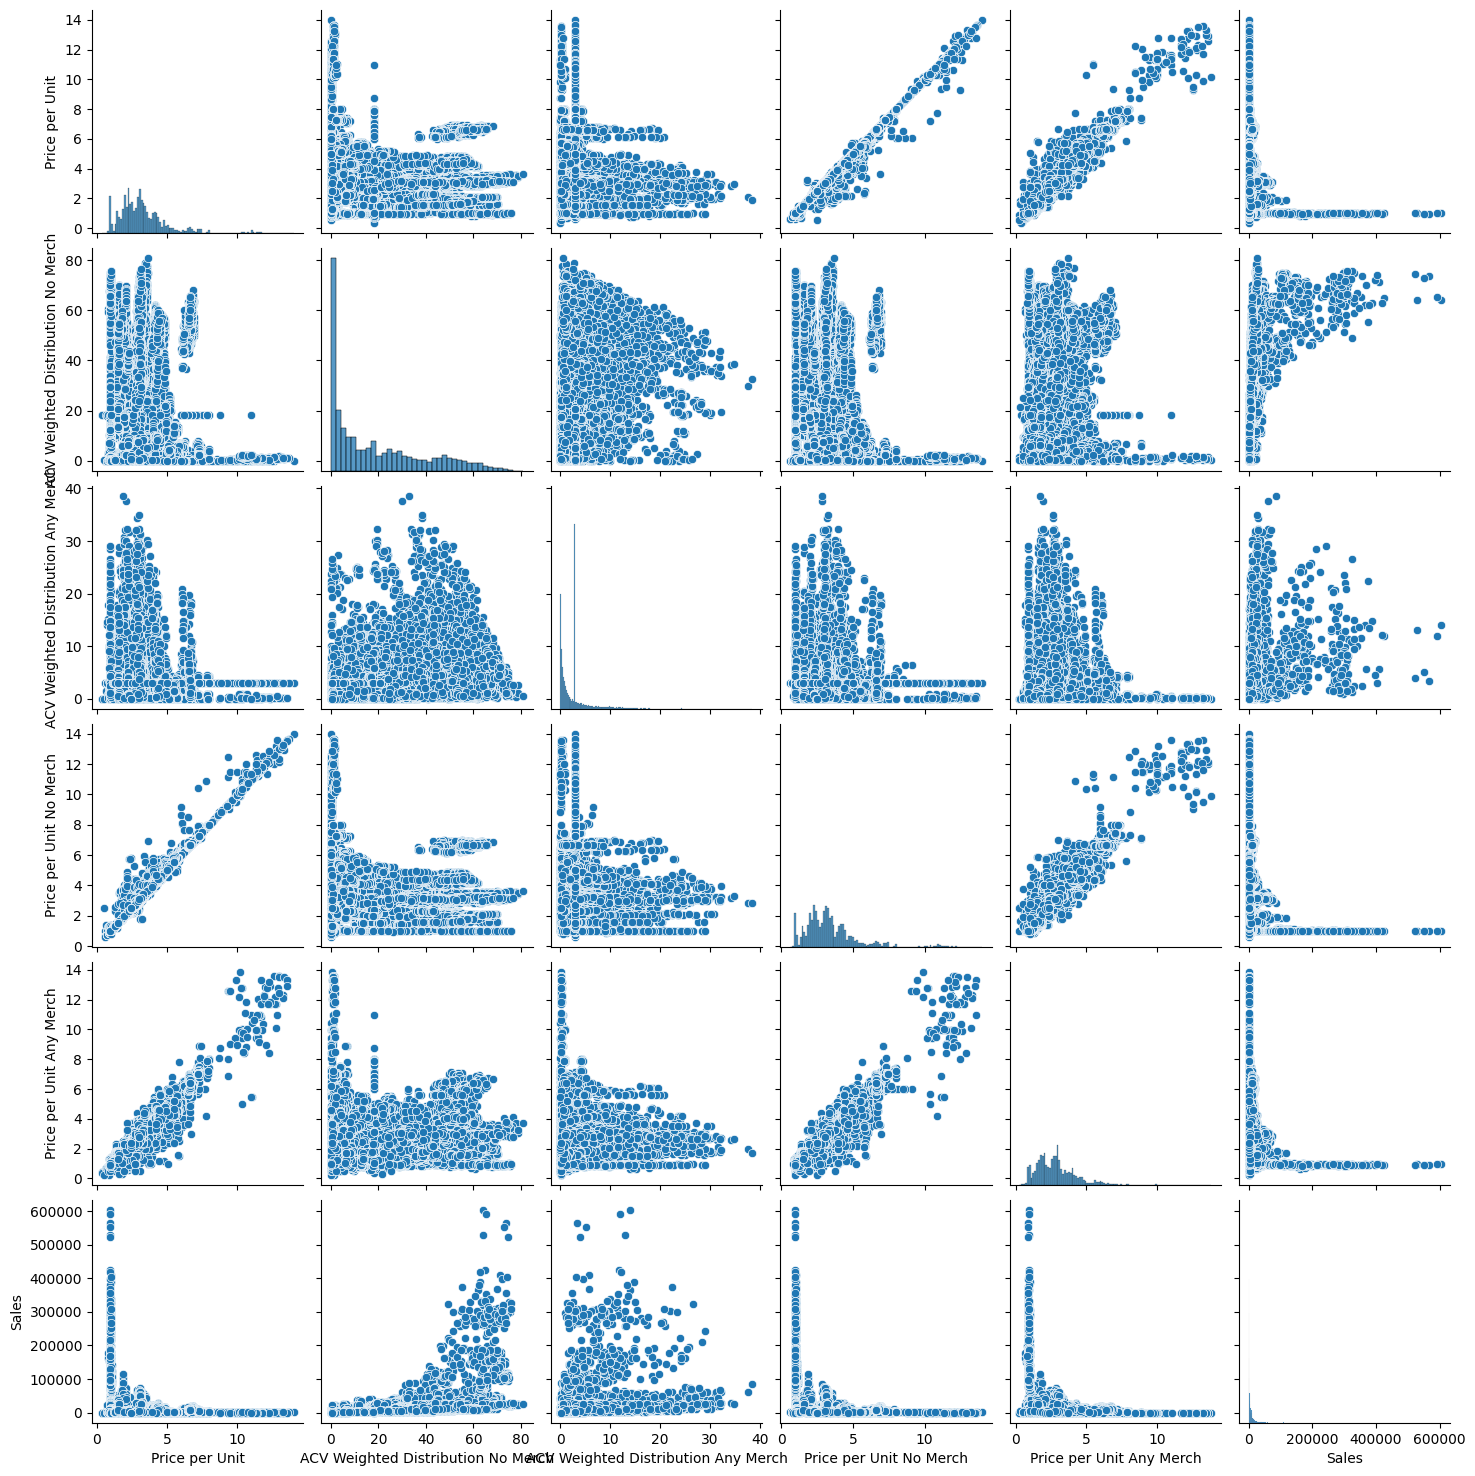

In [ ]:
sns.pairplot(df_table_18_qno1[['Price per Unit','ACV Weighted Distribution No Merch','ACV Weighted Distribution Any Merch','Price per Unit No Merch','Price per Unit Any Merch','Sales']])

In [ ]:
df_table_18_qno1[['Price per Unit','ACV Weighted Distribution No Merch','ACV Weighted Distribution Any Merch','Price per Unit No Merch','Price per Unit Any Merch','Sales']].corr()

,Price per Unit,ACV Weighted Distribution No Merch,ACV Weighted Distribution Any Merch,Price per Unit No Merch,Price per Unit Any Merch,Sales
Price per Unit,1.000000,-0.143630,-0.070242,0.994083,0.959620,-0.216778
ACV Weighted Distribution No Merch,-0.143630,1.000000,0.296262,-0.154359,-0.028357,0.481764
ACV Weighted Distribution Any Merch,-0.070242,0.296262,1.000000,-0.037660,-0.069413,0.275856
Price per Unit No Merch,0.994083,-0.154359,-0.037660,1.000000,0.939237,-0.219472
Price per Unit Any Merch,0.959620,-0.028357,-0.069413,0.939237,1.000000,-0.233698
Sales,-0.216778,0.481764,0.275856,-0.219472,-0.233698,1.000000


In [ ]:
print(skew(df_table_18_qno1['Price per Unit'],bias=False))

print(skew(df_table_18_qno1['Sales'],bias=False))
print(skew(df_table_18_qno1['ACV Weighted Distribution No Merch'],bias=False))
print(skew(df_table_18_qno1['ACV Weighted Distribution Any Merch'],bias=False))
x = df_table_18_qno1[['Price per Unit','ACV Weighted Distribution No Merch','ACV Weighted Distribution Any Merch']]
y = df_table_18_qno1['Sales'].tolist()
 
# adding the constant term
x = sm.add_constant(x)

# performing the regression
# and fitting the model
result = sm.OLS(y, x).fit()
 
# printing the summary table
print(result.summary())

1.9302071340402651
8.711369992326311
0.947925237594864
2.9575593187189746
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.272
Method:                 Least Squares   F-statistic:                     2517.
Date:                Tue, 18 Apr 2023   Prob (F-statistic):               0.00
Time:                        19:00:27   Log-Likelihood:            -2.3268e+05
No. Observations:               20151   AIC:                         4.654e+05
Df Residuals:                   20147   BIC:                         4.654e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

In [ ]:
x = df_table_18_qno1[['Price per Unit','ACV Weighted Distribution No Merch','ACV Weighted Distribution Any Merch',
       'Great Lakes - IRI Standard - Multi Outlet + Conv',
       'Mid-South - IRI Standard - Multi Outlet + Conv',
       'Northeast - IRI Standard - Multi Outlet + Conv',
       'Plains - IRI Standard - Multi Outlet + Conv',
       'South Central - IRI Standard - Multi Outlet + Conv',
       'Southeast - IRI Standard - Multi Outlet + Conv',
       'West - IRI Standard - Multi Outlet + Conv']]

y = df_table_18_qno1['Sales'].tolist()

# adding the constant term
x = sm.add_constant(x)

# performing the regression
# and fitting the model
result = sm.OLS(y, x).fit()
# printing the summary table
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.284
Model:                            OLS   Adj. R-squared:                  0.284
Method:                 Least Squares   F-statistic:                     799.8
Date:                Tue, 18 Apr 2023   Prob (F-statistic):               0.00
Time:                        19:28:21   Log-Likelihood:            -2.3252e+05
No. Observations:               20151   AIC:                         4.651e+05
Df Residuals:                   20140   BIC:                         4.651e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------

In [ ]:

x = df_table_18_qno1[['Price per Unit','Price ^ 2','ACV Weighted Distribution No Merch','ACV Weighted Distribution Any Merch']]
y = df_table_18_qno1['Sales'].tolist()
 
# adding the constant term
x = sm.add_constant(x)

# performing the regression
# and fitting the model
result = sm.OLS(y, x).fit()
 
# printing the summary table
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.320
Model:                            OLS   Adj. R-squared:                  0.320
Method:                 Least Squares   F-statistic:                     2369.
Date:                Tue, 18 Apr 2023   Prob (F-statistic):               0.00
Time:                        19:33:01   Log-Likelihood:            -2.3200e+05
No. Observations:               20151   AIC:                         4.640e+05
Df Residuals:                   20146   BIC:                         4.641e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

In [ ]:

x = df_table_18_qno1[['Price per Unit','Price ^ 2','ACV Weighted Distribution No Merch','ACV Weighted Distribution Any Merch',
       'Great Lakes - IRI Standard - Multi Outlet + Conv',
       'Mid-South - IRI Standard - Multi Outlet + Conv',
       'Northeast - IRI Standard - Multi Outlet + Conv',
       'Plains - IRI Standard - Multi Outlet + Conv',
       'South Central - IRI Standard - Multi Outlet + Conv',
       'Southeast - IRI Standard - Multi Outlet + Conv',
       'West - IRI Standard - Multi Outlet + Conv']]

y = df_table_18_qno1['Sales'].tolist()

# adding the constant term
x = sm.add_constant(x)

# performing the regression
# and fitting the model
result = sm.OLS(y, x).fit()
# printing the summary table
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.331
Model:                            OLS   Adj. R-squared:                  0.331
Method:                 Least Squares   F-statistic:                     907.9
Date:                Tue, 18 Apr 2023   Prob (F-statistic):               0.00
Time:                        19:32:01   Log-Likelihood:            -2.3183e+05
No. Observations:               20151   AIC:                         4.637e+05
Df Residuals:                   20139   BIC:                         4.638e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------

# **Cooking Sprays and Cooking oil**

In [ ]:
df_cooking_salads_qno1['Time'] = pd.to_datetime(df_cooking_salads_qno1['Time'], format='Week Ending %m-%d-%y')
df_cooking_sprays_qno1['Time'] = pd.to_datetime(df_cooking_sprays_qno1['Time'], format='Week Ending %m-%d-%y')
df_cooking_salads_qno1_18 = df_cooking_salads_qno1[df_cooking_salads_qno1['Time'].dt.year == 2018]
df_cooking_sprays_qno1_18 = df_cooking_sprays_qno1[df_cooking_sprays_qno1['Time'].dt.year == 2018]

In [ ]:
x = df_cooking_salads_qno1_18[['Price per Unit','ACV Weighted Distribution No Merch','ACV Weighted Distribution Any Merch']]
y = df_cooking_salads_qno1_18['Sales'].tolist()
 
# adding the constant term
x = sm.add_constant(x)

# performing the regression
# and fitting the model
result = sm.OLS(y, x).fit()
 
# printing the summary table
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.565
Method:                 Least Squares   F-statistic:                 2.179e+04
Date:                Tue, 18 Apr 2023   Prob (F-statistic):               0.00
Time:                        21:50:27   Log-Likelihood:            -5.9945e+05
No. Observations:               50354   AIC:                         1.199e+06
Df Residuals:                   50350   BIC:                         1.199e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

In [ ]:
x = df_cooking_salads_qno1_18[['Price per Unit','Price ^ 2','ACV Weighted Distribution No Merch','ACV Weighted Distribution Any Merch']]
y = df_cooking_salads_qno1_18['Sales'].tolist()
 
# adding the constant term
x = sm.add_constant(x)

# performing the regression
# and fitting the model
result = sm.OLS(y, x).fit()
 
# printing the summary table
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.566
Model:                            OLS   Adj. R-squared:                  0.565
Method:                 Least Squares   F-statistic:                 1.638e+04
Date:                Tue, 18 Apr 2023   Prob (F-statistic):               0.00
Time:                        21:50:38   Log-Likelihood:            -5.9941e+05
No. Observations:               50354   AIC:                         1.199e+06
Df Residuals:                   50349   BIC:                         1.199e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

In [ ]:
x = df_cooking_salads_qno1_18[['Price per Unit','Price ^ 2','ACV Weighted Distribution No Merch','ACV Weighted Distribution Any Merch',
       'Great Lakes - IRI Standard - Multi Outlet + Conv',
       'Mid-South - IRI Standard - Multi Outlet + Conv',
       'Northeast - IRI Standard - Multi Outlet + Conv',
       'Plains - IRI Standard - Multi Outlet + Conv',
       'South Central - IRI Standard - Multi Outlet + Conv',
       'Southeast - IRI Standard - Multi Outlet + Conv',
       'West - IRI Standard - Multi Outlet + Conv']]

y = df_cooking_salads_qno1_18['Sales'].tolist()

# adding the constant term
x = sm.add_constant(x)

# performing the regression
# and fitting the model
result = sm.OLS(y, x).fit()
# printing the summary table
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.568
Model:                            OLS   Adj. R-squared:                  0.568
Method:                 Least Squares   F-statistic:                     6017.
Date:                Tue, 18 Apr 2023   Prob (F-statistic):               0.00
Time:                        21:51:34   Log-Likelihood:            -5.9927e+05
No. Observations:               50354   AIC:                         1.199e+06
Df Residuals:                   50342   BIC:                         1.199e+06
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------

In [ ]:
x = df_cooking_sprays_qno1_18[['Price per Unit','ACV Weighted Distribution No Merch','ACV Weighted Distribution Any Merch']]
y = df_cooking_sprays_qno1_18['Sales'].tolist()
 
# adding the constant term
x = sm.add_constant(x)

# performing the regression
# and fitting the model
result = sm.OLS(y, x).fit()
 
# printing the summary table
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                 1.183e+04
Date:                Tue, 18 Apr 2023   Prob (F-statistic):               0.00
Time:                        21:55:25   Log-Likelihood:            -1.4964e+05
No. Observations:               13331   AIC:                         2.993e+05
Df Residuals:                   13327   BIC:                         2.993e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

In [ ]:
x = df_cooking_sprays_qno1_18[['Price per Unit','Price ^ 2','ACV Weighted Distribution No Merch','ACV Weighted Distribution Any Merch']]
y = df_cooking_sprays_qno1_18['Sales'].tolist()
 
# adding the constant term
x = sm.add_constant(x)

# performing the regression
# and fitting the model
result = sm.OLS(y, x).fit()
 
# printing the summary table
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     8889.
Date:                Tue, 18 Apr 2023   Prob (F-statistic):               0.00
Time:                        21:57:01   Log-Likelihood:            -1.4963e+05
No. Observations:               13331   AIC:                         2.993e+05
Df Residuals:                   13326   BIC:                         2.993e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

In [ ]:
x = df_cooking_sprays_qno1_18[['Price per Unit','Price ^ 2','ACV Weighted Distribution No Merch','ACV Weighted Distribution Any Merch',
       'Great Lakes - IRI Standard - Multi Outlet + Conv',
       'Mid-South - IRI Standard - Multi Outlet + Conv',
       'Northeast - IRI Standard - Multi Outlet + Conv',
       'Plains - IRI Standard - Multi Outlet + Conv',
       'South Central - IRI Standard - Multi Outlet + Conv',
       'Southeast - IRI Standard - Multi Outlet + Conv',
       'West - IRI Standard - Multi Outlet + Conv']]

y = df_cooking_sprays_qno1_18['Sales'].tolist()

# adding the constant term
x = sm.add_constant(x)

# performing the regression
# and fitting the model
result = sm.OLS(y, x).fit()
# printing the summary table
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     3382.
Date:                Tue, 18 Apr 2023   Prob (F-statistic):               0.00
Time:                        21:58:56   Log-Likelihood:            -1.4940e+05
No. Observations:               13331   AIC:                         2.988e+05
Df Residuals:                   13319   BIC:                         2.989e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------